# Call classes

In [9]:
from data_mining import integration, selection, visualization

# Integration Process
#### This part contains the integration process by calling the integration class (note should only be called once, but if accidentally run, we built an error handler.)

In [2]:
x = integration('valorant_games.csv')
x.create_table_load_data('valorant.db')

UNIQUE constraint failed: players.player_id
Failed to integrate data to database.


# Selection Processes
#### This part contains all the call from the database using a class

In [10]:
# call class for the database
x = selection("valorant.db")
# print schema
x.schema()

CREATE TABLE IF NOT EXISTS players(
    player_id INTEGER NOT NULL PRIMARY KEY,
    p_name TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS teams(
    team_id INTEGER NOT NULL PRIMARY KEY,
    t_name TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS agents(
    agent_id INTEGER NOT NULL PRIMARY KEY,
    agent TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS matches(
    match_id INTEGER NOT NULL PRIMARY KEY,
    match_datetime TEXT NOT NULL,
    match_map TEXT NOT NULL,
    team_id1 INTEGER NOT NULL,
    team_id2 INTEGER NOT NULL,
    team1_score INTEGER NOT NULL,
    team2_score INTEGER NOT NULL,
    game_patch FLOAT NOT NULL,
    FOREIGN KEY(team_id1) REFERENCES teams(team_id),
    FOREIGN KEY(team_id2) REFERENCES teams(team_id)
);

CREATE TABLE IF NOT EXISTS player_match_stats(
    rating FLOAT NOT NULL,
    rating_attackers FLOAT NOT NULL,
    rating_defenders FLOAT NOT NULL,
    average_combat_score INTEGER NOT NULL,
    average_combat_score_t INTEGER NOT NULL,
    average_combat_score_ct INTE

In [11]:

data = x.get_data("""
SELECT SUM(player_match_stats.kills) AS total_kills, players.p_name 
FROM player_match_stats
JOIN players
ON player_match_stats.player_id = players.player_id 
GROUP BY players.p_name
ORDER BY total_kills DESC 
LIMIT 10;
""")

# Visualization or Knowledge Presentation
#### This part contains all the visualization or presentation of pattern seen in the data

In [12]:
vis = visualization()

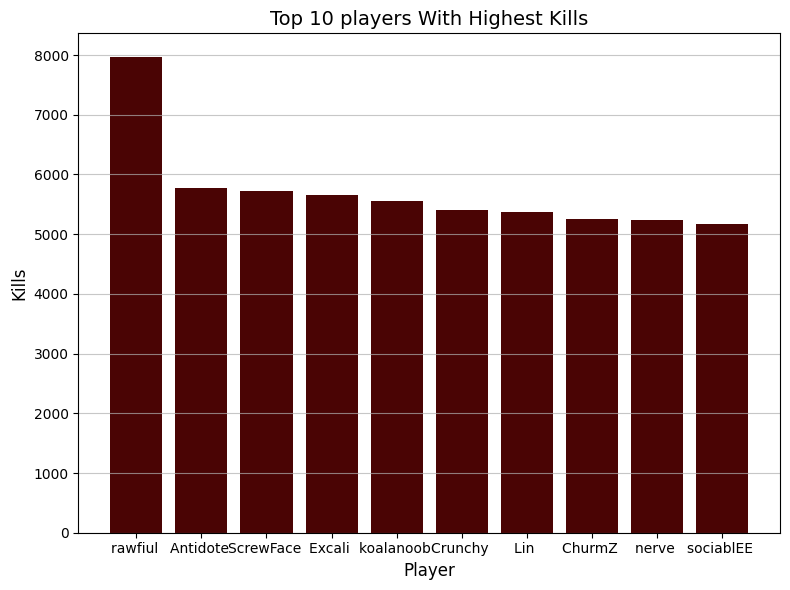

In [13]:
vis.top(df=data, dfx='p_name', dfy='total_kills', x_name='Player', y_name='Kills', title="Top 10 players With Highest Kills", color="#4A0404")